# Create the Vocabulary

While other solutions use "minimal meaningful Latex symbols" (e.g. https://arxiv.org/pdf/1609.04938v1.pdf), we will first try to do a character-based model.

In [50]:
import collections

def get_formulas():
    formulas_file = "data/im2latex_formulas.lst"
    with open(formulas_file) as fp:
        formulas = [l.strip() for l in fp]
        
    return formulas

def get_frequent_symbols(symbols, min_count=10):
    truncated_symbols = []
    for symbol, count in symbols.most_common():
        if ord(symbol) >= 128:
            print "Skipping non-ascii character:", symbol
            continue

        if count > min_count:
            truncated_symbols.append(symbol)
        else:
            break
    return truncated_symbols

In [51]:
# Let's read all of the formulas and extract all of the symbols.
f = get_formulas()
symbol_counts = collections.Counter([char for formula in f for char in formula])
common_symbols = get_frequent_symbols(symbol_counts, min_count=10)

# These are the symbols I can think of that should definitely be included.
manual_symbols = r"abcdefghijklmnopqrstuvwxyz" + \
                 r"ABCDEFGHIJKLMNOPQRSTUVWXYZ" + \
                 r"0123456789" + \
                 r"{}\_^()&~;. *%!@#$?<>|'~[] "
            
manual = set(c for c in manual_symbols)
from_data = set(c for c in common_symbols)

# Let's just make sure they're all included.
assert len(manual.difference(from_data)) == 0

# And save the index to character mapping to file.
with open('character_mapping.txt', 'w') as fp:
    fp.write("PAD\nGO\n")
    fp.write("\n".join(char for char in common_symbols))

Skipping non-ascii character: �
Skipping non-ascii character: �


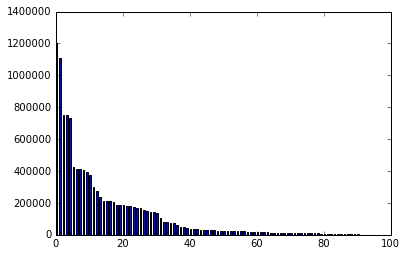

In [48]:
# Let's also visualize the distribution.
%matplotlib inline 
import matplotlib.pyplot as plt


ind = xrange(len(common_symbols))
counts = [symbol_counts[sym] for sym in common_symbols]
plt.bar(ind, counts, 0.5)
plt.show()